## 詞頻矩陣

In [1]:
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
       '留洪智坤 柯：殘障求職不易',
       '人事處議處洪智坤　柯P：不清楚議處結果']

In [2]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = []
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/46/b7dzk4mn6g54qzptv608w7d00000gn/T/jieba.cache
Loading model cost 0.808 seconds.
Prefix dict has been built succesfully.


In [3]:
corpus

['【 更新 】 柯P ： 洪智坤 洩漏 公文案 還 沒 看到 公文 \u3000 今 處理',
 '留 洪智坤   柯 ： 殘障 求職 不易',
 '人事處 議處 洪智坤 \u3000 柯P ： 不 清楚 議處 結果']

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer =  CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [5]:
print(vectorizer.get_feature_names())

['不易', '人事處', '公文', '公文案', '更新', '柯p', '殘障', '求職', '洩漏', '洪智坤', '清楚', '看到', '結果', '處理', '議處']


In [6]:
X.toarray()

array([[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2]], dtype=int64)

In [7]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)
cs

array([[0.        , 0.8232233 , 0.76429774],
       [0.8232233 , 0.        , 0.83333333],
       [0.76429774, 0.83333333, 0.        ]])

## KMeans

In [10]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20150628news.xlsx', index_col = 0)

In [11]:
news.head(3)

,category,description,pubdate,title
0,社會/生活,新北市八仙水上樂園昨晚發生粉塵爆炸，新北市衛生局統計到目前為止，由救護車送醫再加上自行送醫的...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙塵爆 五相關人依公共危險重傷害法辦
1,社會/生活,新北市八仙樂園昨天晚上(6/27)舉辦活動，過程中噴灑大量玉米粉而引發粉塵爆炸，根據最新統計...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙樂園意外 病患持續增加中
2,財經/要聞,希臘債務違約限期逼近，資金持續外流。路透社引述三間銀行的消息指出，希臘國內有3分之1的自動櫃...,"Sun, 28 Jun 2015 07:40:00 +0800",希臘國內三分一自動櫃員機現金短缺


In [16]:
import jieba
jieba.load_userdict('userdict.txt')
titles = []
corpus = []
for idx, rec in news.iterrows():
    #print(idx, rec)
    corpus.append(' '.join(jieba.cut(rec['description'])))
    titles.append(rec['title'])

In [19]:
#corpus[0]
titles[0]

'八仙塵爆  五相關人依公共危險重傷害法辦'

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [21]:
X.shape

(147, 11139)

In [22]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [23]:
cs.shape

(147, 147)

In [53]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=4, init='k-means++', random_state=42)
group = clf.fit_predict(cs)

In [54]:
group

array([0, 0, 3, 1, 0, 1, 0, 1, 1, 1, 1, 0, 3, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 0,
       0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 2, 0, 0, 3, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2], dtype=int32)

In [55]:
import numpy
grades = numpy.array([50,60,90,80,40])
g = numpy.array([1,1,2,2,1])
grades[g == 1]

array([50, 60, 40])

In [60]:
import numpy
np_titles = numpy.array(titles)
np_titles[group ==3].tolist()

['希臘國內三分一自動櫃員機現金短缺',
 '歐元區財長拒希臘延長救助計劃',
 '呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)',
 '希臘違約在即  歐盟全力穩定經濟',
 '希臘脫歐變可能 歐洲衝擊大',
 '希債協議  法國願盡最後斡旋努力',
 '希臘1／3提款機錢被提光',
 '確保銀行穩定 希臘續與ECB緊密合作',
 '希臘態度強硬 歐元區耐心漸失',
 '希臘盼展延債務 歐元區拒絕']

## Silhouette

In [41]:
from sklearn.metrics import silhouette_score
silhouette_score(cs, labels = group)

0.22652427235275951

In [50]:
sil_ary = []
for k in range(2,11):
    clf = KMeans(n_clusters=k, init='k-means++', random_state=42)
    group = clf.fit_predict(cs)
    sil_score =silhouette_score(cs, labels = group)
    sil_ary.append({'group': k,'silhouette':sil_score})

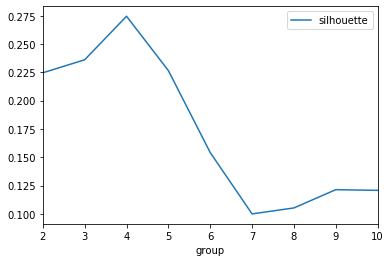

In [52]:
import pandas
df = pandas.DataFrame(asil_ary)
df.plot(x='group', y = 'silhouette')

In [9]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20171214news.xlsx', index_col=0)

In [10]:
news.head(3)

,category,content,link,title
0,政治,新增：立委說法民進黨立法院黨團預計在明天的院會中，讓改制農田水利會的《農田水利會組織通則》修...,https://tw.news.appledaily.com/politics/realti...,【更新】水利會改官派明闖關 綠委24小時前顧議場大門防藍突襲
1,論壇,邱俊棠／台中市民、見習醫師；曾任台灣醫學生聯合會對外副會長對於公民參與公眾事務而能得到單位首...,https://tw.news.appledaily.com/forum/realtime/...,請中市府為所當為 加速中火燃煤限制
2,社會,被控來台涉發展情報組織的中國學生周泓旭，因接觸我方外交部官員而露餡落網，今年9月被台北地院一...,https://tw.news.appledaily.com/local/realtime/...,陸生共諜嗆台司法 「不敢公開審理我」


In [13]:
import jieba
titles = []
corpus = []
for idx, rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec['content'])))
    titles.append(rec['title'])

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/46/b7dzk4mn6g54qzptv608w7d00000gn/T/jieba.cache
Loading model cost 0.609 seconds.
Prefix dict has been built succesfully.


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [15]:
X.shape

(899, 28936)

In [16]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [17]:
cs.shape

(899, 899)

In [69]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=5, init='k-means++', random_state=42)
group = clf.fit_predict(cs)

In [70]:
np_titles = numpy.array(titles)

In [76]:
#np_titles[group==4].tolist()

In [77]:
sil_ary = []
for k in range(2,21):
    clf = KMeans(n_clusters=k, init='k-means++', random_state=42)
    group = clf.fit_predict(cs)
    sil_score =silhouette_score(cs, labels = group)
    sil_ary.append({'group': k,'silhouette':sil_score})

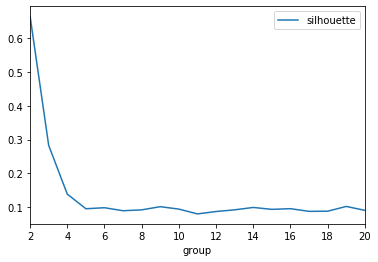

In [79]:
import pandas
df = pandas.DataFrame(sil_ary)
df.plot(x='group', y = 'silhouette')

## NetworkX

In [4]:
import networkx as nx
G = nx.Graph()
G.add_node('a')
G.add_node('b')
G.add_node('c')
G.add_edge('a', 'b')
G.add_edge('a', 'c')
G.add_edge('b', 'c')

Populating the interactive namespace from numpy and matplotlib


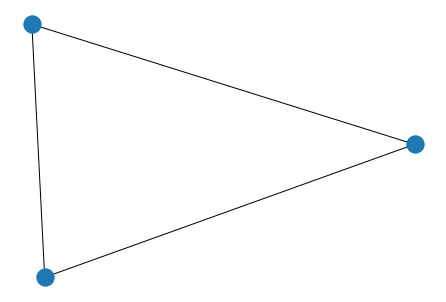

In [5]:
%pylab inline
nx.draw(G)

In [6]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 1.],
        [1., 0., 1.],
        [1., 1., 0.]])

In [7]:
nx.to_numpy_array(G)

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [18]:
cs.shape

(899, 899)

In [57]:
m = (cs < 0.5).astype(int)

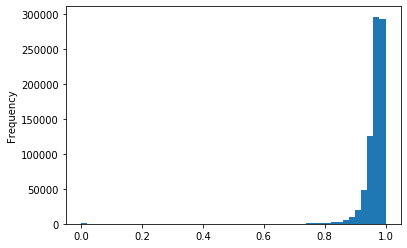

In [104]:
import pandas
pandas.Series(cs.flatten()).plot(kind = 'hist', bins = 50)

In [58]:
G = nx.from_numpy_array(m)

In [59]:
G

In [27]:
! pip install python-louvain

You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [60]:
import community
group = community.best_partition(G)

In [61]:
from collections import Counter
c = Counter(np.array(list(group.values())))
c.most_common(10)

[(3, 30),
 (70, 20),
 (114, 8),
 (141, 8),
 (142, 5),
 (153, 5),
 (124, 4),
 (195, 4),
 (334, 4),
 (599, 4)]

In [67]:
len(c)

753

In [62]:
cluster_idx = np.array(list(group.values()))

In [63]:
import numpy as np
np_titles = np.array(titles)

In [66]:
np_titles[cluster_idx == 141].tolist()

['【美夢一場】美台軍艦互訪皆是空？\u3000卜睿哲：川普不會執行',
 '美國會授權軍艦來台\u3000蒲博思：總統職權不需國會指揮',
 '美台軍艦互訪寫入國會意見\u3000前高官：川普不會執行',
 '川普簽NDAA評估美台軍艦互停\u3000立委憂台灣成籌碼',
 '美台軍艦互訪？\u3000陸國台辦：挾洋自重不可能得逞',
 '美國務卿首度未提《台灣關係法》\u3000外交部：對台政策不變',
 '川普簽署國防授權法\u3000美艦停台列國會意見',
 '【誰怕誰】中國嗆武統台灣\u3000美議員：美台應聯合軍演']

In [84]:
cluster_ary = numpy.squeeze(numpy.array(X[cluster_idx == 141, :].sum(axis = 0)))
cluster_ary.argsort()[::-1][0:10]

array([21647,  7209, 10807,  8211, 25243, 21642, 21444,  3065, 17228,
       12373])

In [87]:
feature_name = numpy.array(vectorizer.get_feature_names())
feature_name[cluster_ary.argsort()[::-1][0:10]]

array(['美國', '台灣', '川普', '國會', '軍艦', '美台', '總統', '中國', '法案', '意見'],
      dtype='<U18')

In [91]:
for g,v in c.most_common(10):
    #print(g, v) 
    print('代表文章:',np_titles[cluster_idx == g].tolist()[0])
    cluster_ary = numpy.squeeze(numpy.array(X[cluster_idx == g, :].sum(axis = 0)))
    cluster_ary.argsort()[::-1][0:10]
    print('關鍵字詞:',feature_name[cluster_ary.argsort()[::-1][0:10]].tolist())
    print('文章聲量:',v)
    #for t in np_titles[cluster_idx == g].tolist():
    #    print(t)
    print('=====================================')

代表文章: 【特企】NGO聯名譴責中共迫害宗教信仰
關鍵字詞: ['教會', '全能', '宗教', '中國', '自由', '國際', '組織', '人權', '政府', '遭受']
文章聲量: 30
代表文章: 【狗仔偷拍】小嫻搬離何守正家租66坪房　月租6萬元
關鍵字詞: ['小嫻', '何守正', '離婚', '結婚', '美國', '妙禪', '何家', '時間', '兩人', '表示']
文章聲量: 20
代表文章: 驚！　野生捕獲恐龍遛汪星人
關鍵字詞: ['ig', '專頁', '影片', '網友', '分享', '網路', '請上', '日前', '毛愛', '綜合']
文章聲量: 8
代表文章: 【美夢一場】美台軍艦互訪皆是空？　卜睿哲：川普不會執行
關鍵字詞: ['美國', '台灣', '川普', '國會', '軍艦', '美台', '總統', '中國', '法案', '意見']
文章聲量: 8
代表文章: 【咩姊台語】做直銷開公司建人脈　張誌家與前妻吸千萬捲款
關鍵字詞: ['張誌家', '安倢', '公司', '鍾女', '鼎盛', '直銷', '投資', '股東', '友人', '報導']
文章聲量: 5
代表文章: 【搏感情動畫】台電每年30億敦親睦鄰費　協助立委選民服務
關鍵字詞: ['台電', '補助', '申請', '立委', '顏寬恒', '空污', '一手', '經費', '萬元', '報導']
文章聲量: 5
代表文章: 打臉提勒森　白宮：現在不是與北韓談判的時機
關鍵字詞: ['北韓', '金正恩', '美國', '提勒', '核武', '國際', '談判', '國務卿', '報導', '飛彈']
文章聲量: 4
代表文章:  回應北檢聲明　徐巧芯 ：不要事情鬧大了才推給媒體
關鍵字詞: ['北檢', '前總統', '檢方', '媒體', '報導', '馬英九', '徐巧芯', '洩密', '公開', '內容']
文章聲量: 4
代表文章: 【壹週刊】百億貸款將到期　柯P放容積解套京華城
關鍵字詞: ['京華城', '容積率', '560', '計畫', '都市', '監察院', '北市府', '都發局', '提出', '放寬']
文章聲量: 4
代表文章: 海嘯哥登Google暴紅運動員冠軍
關鍵字詞: ['台灣', '

In [92]:
G2 = nx.from_numpy_array(cs)

In [93]:
import community
group2 = community.best_partition(G2)

In [94]:
from collections import Counter
c2 = Counter(np.array(list(group2.values())))
c2.most_common(10)

[(0, 899)]

## 文章分類

In [105]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20171214news.xlsx', index_col=0)

In [106]:
news.head(3)

,category,content,link,title
0,政治,新增：立委說法民進黨立法院黨團預計在明天的院會中，讓改制農田水利會的《農田水利會組織通則》修...,https://tw.news.appledaily.com/politics/realti...,【更新】水利會改官派明闖關 綠委24小時前顧議場大門防藍突襲
1,論壇,邱俊棠／台中市民、見習醫師；曾任台灣醫學生聯合會對外副會長對於公民參與公眾事務而能得到單位首...,https://tw.news.appledaily.com/forum/realtime/...,請中市府為所當為 加速中火燃煤限制
2,社會,被控來台涉發展情報組織的中國學生周泓旭，因接觸我方外交部官員而露餡落網，今年9月被台北地院一...,https://tw.news.appledaily.com/local/realtime/...,陸生共諜嗆台司法 「不敢公開審理我」


In [107]:
news['category'].unique()

array(['政治', '論壇', '社會', '生活', '財經地產', '娛樂', '體育', '國際', '副刊', '動物', '3C',
       '壹週刊'], dtype=object)

In [110]:
corpus = []
titles = []
tags   = []
for idx, rec in news[news['category'].isin(['社會', '娛樂'])].iterrows():
    corpus.append(' '.join(jieba.cut(rec['content'])))
    titles.append(rec['title'])
    tags.append(rec['category'])

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [112]:
X.shape

(247, 11380)

In [113]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y, train_titles, test_titles =  train_test_split(X, tags, titles, test_size = 0.3, random_state = 42)

In [114]:
train_X.shape

(172, 11380)

In [115]:
test_X.shape

(75, 11380)

In [116]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha= 0.01)
clf.fit(train_X, train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [118]:
predicted = clf.predict(test_X)

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)

0.9866666666666667

In [121]:
print(clf.classes_)

['娛樂' '社會']


In [120]:
confusion_matrix(test_y, predicted)

array([[32,  0],
       [ 1, 42]])

In [124]:
import numpy
np_test_titles = numpy.array(test_titles)
np_test_titles[test_y != predicted]

array(['【K律師論點】離婚＝失敗？\u3000K律師這麼說'], dtype='<U36')

In [125]:
s = '''
桃園一名江姓男子今年8月10日清晨把車停在紅線上，見楊姓警員趨前盤查，因恐車上的槍、毒被查獲，先與楊員發生拉扯，繼而猛踩油門拖著楊員加速逃逸，在旁警戒的警員見情況危急向車輛左後輪開了6槍射破輪胎後，才將其制伏，隨後在車上起出子彈1顆、毒咖啡包及彩虹菸毒品，桃園地檢署今天（20日）依違反《槍砲彈藥刀械管制條例》及妨害公務等罪嫌起訴。
 
檢警調查，平鎮警方今年8月10日清晨上午行經中壢區中山東路與仁德街口時，發現40歲江姓男子開著黑色自小客車、敞開車門違停在紅線上，當時帶班的巡佐楊恩貴趨前盤查時發現駕駛座上疑有毒咖啡包，要求男子熄火受檢，但車內男子見警察出現，立即關上車門準備逃逸。
 
巡佐楊恩貴見狀後立即撲向駕駛座，在駕駛座上與江男拉扯，但江男無視楊員仍在車上，還是猛踩油門落跑，後方警員見狀況緊急，立刻朝該車左後輪開了6槍，直至射破輪胎後才阻止其逃逸，隨後警方將江男制伏，並在男子車內查獲65公克K他命、咖啡包及彩虹煙29根（持有毒品另案偵辦），以及子彈1發。
 
雖然江男坦承持有子彈和毒品，但辯稱當時沒有跟警察發生拉扯，只是踩油門要離開而已，惟因警員指證歷歷，還有密錄器等，未獲採信，桃園地檢署今依違反《槍砲彈藥刀械管制條例》及妨害公務等罪嫌起訴。（突發中心張沛森／桃園報導）
'''

In [126]:
s_corpus = [' '.join(jieba.cut(s))]

In [129]:
s_X = vectorizer.transform(s_corpus)

In [130]:
clf.predict(s_X)

array(['社會'], dtype='<U2')

In [131]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(zip(vectorizer.get_feature_names(), \
                        clf.feature_count_[0], clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c2/(c1 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0), reverse=True)[0:20]:
    print(i)


(65.0, '男子', 0.0, 65.0)
(48.0, '警員', 0.0, 48.0)
(38.0, '突發', 0.0, 38.0)
(36.0, '新北', 0.0, 36.0)
(36.0, '機車', 0.0, 36.0)
(34.0, '江男', 0.0, 34.0)
(32.0, '進行', 0.0, 32.0)
(31.0, '法官', 0.0, 31.0)
(30.4, '警方', 4.0, 152.0)
(30.0, '少年', 0.0, 30.0)
(30.0, '張男', 0.0, 30.0)
(30.0, '派出所', 0.0, 30.0)
(29.0, '陳姓', 0.0, 29.0)
(29.0, '陳男', 0.0, 29.0)
(27.0, '林男', 0.0, 27.0)
(24.0, '時許', 0.0, 24.0)
(24.0, '檢方', 0.0, 24.0)
(24.0, '警察', 0.0, 24.0)
(23.5, '律師', 1.0, 47.0)
(23.0, '法院', 0.0, 23.0)


In [132]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(zip(vectorizer.get_feature_names(), \
                        clf.feature_count_[0], clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c1/(c2 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0), reverse=True)[0:20]:
    print(i)


(27.0, '妙禪', 27.0, 0.0)
(22.0, '何家', 22.0, 0.0)
(22.0, '演出', 22.0, 0.0)
(17.0, '女星', 17.0, 0.0)
(15.0, '三姊', 15.0, 0.0)
(15.0, '媽寶', 15.0, 0.0)
(15.0, '電影', 15.0, 0.0)
(14.090909090909092, '小嫻', 155.0, 10.0)
(13.0, '二姊', 13.0, 0.0)
(13.0, '最佳', 13.0, 0.0)
(13.0, '節目', 13.0, 0.0)
(13.0, '粉絲', 13.0, 0.0)
(12.5, '婆婆', 25.0, 1.0)
(12.0, '明年', 12.0, 0.0)
(12.0, '法國', 12.0, 0.0)
(11.0, '你們', 11.0, 0.0)
(11.0, '娛樂', 11.0, 0.0)
(11.0, '巴黎', 11.0, 0.0)
(10.0, '101', 10.0, 0.0)
(9.909090909090908, '何守正', 109.0, 10.0)
